# Simple CNN on MNIST - Security Due to Overfitting

In [1]:
import numpy as np

import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import tensorflow as tf

from cleverhans.utils_mnist import data_mnist
from cleverhans.attacks import (BasicIterativeMethod, CarliniWagnerL2, DeepFool, ElasticNetMethod, 
                                FastFeatureAdversaries, FastGradientMethod, LBFGS, MadryEtAl, 
                                MomentumIterativeMethod, SPSA, SaliencyMapMethod, VirtualAdversarialMethod)
from cleverhans.utils_keras import KerasModelWrapper

from ipywidgets import interact
import ipywidgets as widgets

/home/Chris/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

## Configurable Parameters

In [3]:
run_ident = '7'
epochs = 50
num_points = 10
attack_names = ['basic_iterative', 'fast_gradient', 'madry', 'momentum_iterative']

In [9]:
#losses = np.load('loss_r{}.npy'.format(run_ident))
#accuracies = np.load('accuracy_r{}.npy'.format(run_ident))

losses = np.zeros((epochs, len(attack_names), num_points))
accuracies = np.zeros((epochs, len(attack_names), num_points))

for epoch in range(epochs):    
    try:
        junk_losses = np.load('results_r{}/loss_e{}.npy'.format(run_ident, epoch))
        junk_accuracies = np.load('results_r{}/accuracy_e{}.npy'.format(run_ident, epoch))

        losses[epoch,:,:] = junk_losses[epoch,:,:]
        accuracies[epoch,:,:] = junk_accuracies[epoch,:,:]
    except:
        print('Missing {}'.format(epoch))

In [5]:
max_loss = losses.flatten().max()
max_accuracy = accuracies.flatten().max()

In [6]:
def plot_func(epoch):
    fig = plt.figure(figsize=(8, 6))
    plt.subplot(121)
    for index, attack_name in enumerate(attack_names):
        x_plt = np.linspace(0, 0.5, num_points)
        y_plt = losses[epoch, index, :].flatten()
        plt.plot(x_plt, y_plt, label=attack_name)
    plt.title('Adversarial Loss')
    plt.xlabel('Attack Strength')
    plt.ylabel('Loss')
    plt.ylim(ymax=max_loss)
    plt.legend()

    plt.subplot(122)
    for index, attack_name in enumerate(attack_names):
        x_plt = np.linspace(0, 0.5, num_points)
        y_plt = accuracies[epoch, index, :].flatten()
        plt.plot(x_plt, y_plt, label=attack_name)
    plt.title('Adversarial Accuracy')
    plt.xlabel('Attack Strength')
    plt.ylabel('Accuracy')
    plt.ylim(ymax=max_accuracy)
    plt.legend()
    plt.show()

In [7]:
interact(plot_func, epoch=widgets.IntSlider(min=0,max=epochs-1,step=1,value=0));

interactive(children=(IntSlider(value=0, description='epoch', max=49), Output()), _dom_classes=('widget-interact',))

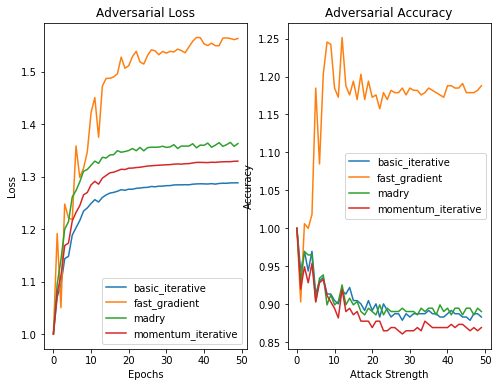

In [15]:
fig = plt.figure(figsize=(8, 6))

losses_sum = np.sum(losses, axis=2)

plt.subplot(121)
for index, attack_name in enumerate(attack_names):
    x_plt = np.arange(epochs)
    y_plt = losses_sum[:, index].flatten() / losses_sum[0, index]
    plt.plot(x_plt, y_plt, label=attack_name)
plt.title('Adversarial Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

accuracies_sum = np.sum(accuracies, axis=2)

plt.subplot(122)
for index, attack_name in enumerate(attack_names):
    x_plt = np.arange(epochs)
    y_plt = accuracies_sum[:, index].flatten() / accuracies_sum[0, index]
    plt.plot(x_plt, y_plt, label=attack_name)
plt.title('Adversarial Accuracy')
plt.xlabel('Attack Strength')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
losses_sum = np.sum(losses, axis=2)
print(losses_sum[0])

[95.51329961 52.55692831 90.46712001 92.46422282]


In [16]:
losses_sum = np.sum(losses, axis=2)
accuracies_sum = np.sum(accuracies, axis=2)

losses_rel = np.zeros((epochs, len(attack_names)))
accuracies_rel = np.zeros((epochs, len(attack_names)))

for index, attack_name in enumerate(attack_names):
    losses_rel[:, index] = losses_sum[:, index].flatten() / losses_sum[0, index]
    accuracies_rel[:, index] = accuracies_sum[:, index].flatten() / accuracies_sum[0, index]

In [18]:
np.savetxt('losses_rel_r{}.out'.format(run_ident), losses_rel, delimiter=',')
np.savetxt('accuracies_rel{}.out'.format(run_ident), accuracies_rel, delimiter=',')